# How-To: Control a Poppy Humanoid in V-REP using [pypot](https://github.com/poppy-project/pypot)

![alt text](image/vrep-header.png)

## Introduction

In this notebook, we will present how a simulated poppy humanoid can be controlled in real time using pypot.

In more details, we will:
* see how we can **instantiate a simulated poppy humanoid in V-REP**
* learn how we can **read/send values to the motors**
* **track** one of poppy's part 3D **position and orientation** (e.g. its head)
* write a **simple primitive** to design higher level behaviors

*Note: Most of the tutorial is redundant with the ones on how to control a "real" poppy creature. In particular, switching from a real robot to a simulated one (and vice versa) can be done just by changing a single line of code (see the [appendix]() at the end of this notebook). Furthermore, most of the notebook can be applied to any [Poppy Creature](https://www.poppy-project.org/technologies/) (and even any "[pypot robot](http://poppy-project.github.io/pypot/pypot.robot.html#pypot.robot.robot.Robot)"), only the instantiation method will change.*

### What's needed?

To follow this tutorial you will need:

* the [V-REP](http://www.coppeliarobotics.com) simulator (please directly see [v-rep download section](http://www.coppeliarobotics.com/downloads.html) for installation details)
* the python [pypot](https://github.com/poppy-project/pypot) library version >= 2.1
* the [poppy_humanoid](https://github.com/poppy-project/Poppy-Humanoid) software library >= 1.0

Both V-REP and the pypot/poppy libraries are open source and cross platform. Thus, it should work on Windows, Mac, and Linux.

The pypot and poppy_humanoid library can be installed via pip:

```bash
pip install poppy_humanoid
```

or (depending on your python configuration)

```bash
sudo pip install poppy_humanoid
```

You can also install them from the source and then use the classical:

```bash
python setup.py install
```
or (depending on your python configuration)
```bash
sudo python setup.py install
```

*Note: installing poppy_humanoid will also install pypot as it is one of the depencies.*

If you are not familiar with python packages installation process, you can refer to [this documentation](https://packaging.python.org/en/latest/installing.html) for instance.

### Checking your installation

To check if everything is installed correctly, you can run the following code. If it runs without raising an error, everything is probably installed correctly:

In [1]:
from pypot.vrep import from_vrep
from poppy.creatures import PoppyHumanoid

If you have any installation issue, please check [our forum](https://forum.poppy-project.org).

## Instantiating a [Poppy Humanoid](https://www.poppy-project.org/creatures/poppy-humanoid/)

In this section, we will see how a Poppy Humanoid can be instantiated into V-REP and how we can connect it to a [pypot Robot](http://poppy-project.github.io/pypot/pypot.robot.html).

First, you will need to launch V-REP (please refer to [V-REP documentation](http://www.coppeliarobotics.com/helpFiles/index.html) if you don't know how to do it). Once it's done you should see something like:

![alt text](image/vrep-screenshot.png)

Instead of loading a specific scene with a Poppy humanoid through the V-REP GUI and then connect to it using pypot, we will directly instantiate the [PoppyHumanoid](https://github.com/poppy-project/Poppy-Humanoid) class which will do most of the work for us.

In particular, it will:
* load a V-REP scene with a Poppy Humanoid
* instantiate a [pypot Robot](http://poppy-project.github.io/pypot/pypot.robot.html) and connect it to the simulated Poppy

To do that, we will use the following code:

In [1]:
from poppy.creatures import PoppyHumanoid

poppy = PoppyHumanoid(simulator='vrep', host='127.0.0.1')

You should now see a Poppy in your V-REP window:

![alt text](image/vrep-poppy.png)

**Note: Be careful that VREP is often displaying pop-up that freezes the communication with pypot. You will have to close them otherwise a timeout will occur!**

## Controlling motors

As soon as you have instantiated a [Robot](http://poppy-project.github.io/pypot/pypot.robot.html#pypot.robot.robot.Robot) - in our case through the [PoppyHumanoid](https://github.com/poppy-project/Poppy-Humanoid) class - it is synced with the simulation (or the real robot). This means that values from the V-REP simulation (e.g. limbs position) are retrieved and affected to their equivalent variables. Similarly target variables (e.g. motors goal position) are sent to V-REP. This synchronization loop runs at 50Hz by default.

To be more clear, when reading a variable from the *poppy* object you will obtain the last synced value from V-REP and when setting a new value to a *poppy* variable it will be automatically sent to V-REP a short time after. You never need to manually sync your instance with the current state of the simulation, it is automatically done by a thread running in background.

### Accessing motors registers

So, first we will retrieve the list of all available motors. The [motors](http://poppy-project.github.io/pypot/pypot.robot.html#pypot.robot.robot.Robot.motors) variable contains the list of all motors attached to the current robot. 

By default, each motor print its name, its id, and its current position:

In [3]:
poppy.motors

[<DxlMotor name=l_elbow_y id=44 pos=-0.0>,
 <DxlMotor name=r_elbow_y id=54 pos=-0.0>,
 <DxlMotor name=r_knee_y id=24 pos=0.2>,
 <DxlMotor name=head_y id=37 pos=-17.2>,
 <DxlMotor name=head_z id=36 pos=-0.0>,
 <DxlMotor name=r_arm_z id=53 pos=-0.0>,
 <DxlMotor name=r_ankle_y id=25 pos=1.3>,
 <DxlMotor name=r_shoulder_x id=52 pos=1.1>,
 <DxlMotor name=r_shoulder_y id=51 pos=0.0>,
 <DxlMotor name=r_hip_z id=22 pos=0.1>,
 <DxlMotor name=r_hip_x id=21 pos=0.8>,
 <DxlMotor name=r_hip_y id=23 pos=-0.0>,
 <DxlMotor name=l_arm_z id=43 pos=-0.0>,
 <DxlMotor name=l_hip_x id=11 pos=0.0>,
 <DxlMotor name=l_hip_y id=13 pos=-0.1>,
 <DxlMotor name=l_hip_z id=12 pos=0.0>,
 <DxlMotor name=abs_x id=32 pos=0.0>,
 <DxlMotor name=abs_y id=31 pos=0.4>,
 <DxlMotor name=abs_z id=33 pos=0.0>,
 <DxlMotor name=l_ankle_y id=15 pos=0.6>,
 <DxlMotor name=bust_y id=34 pos=0.7>,
 <DxlMotor name=bust_x id=35 pos=0.2>,
 <DxlMotor name=l_knee_y id=14 pos=0.0>,
 <DxlMotor name=l_shoulder_x id=42 pos=0.3>,
 <DxlMotor name=

You can access a specific motor directly using its name:

In [4]:
poppy.l_shoulder_y

<DxlMotor name=l_shoulder_y id=41 pos=-0.2>

If we want to get the current position (in degrees) of a specific motor (e.g. *head_y*) we can use:

In [2]:
poppy.head_y.present_position

-14.0

You can also use the list/dict comprehension to retrieve a specific value for all motors.

A list of all current motor positions:

In [6]:
[m.present_position for m in poppy.motors]

[-0.0,
 -0.0,
 0.2,
 -17.3,
 0.0,
 -0.0,
 1.3,
 1.0999999999999943,
 0.0,
 0.1,
 1.0,
 -0.0,
 -0.0,
 -0.1,
 -0.10000000000000009,
 -0.0,
 0.0,
 0.4,
 0.0,
 0.6,
 0.7,
 0.2,
 0.0,
 0.29999999999999716,
 -0.09999999999999432]

A dictionary of pairs {motor_name: motor_position}:

In [8]:
{m.name: m.present_position for m in poppy.motors}

{u'abs_x': 0.0,
 u'abs_y': 0.2,
 u'abs_z': 0.0,
 u'bust_x': 0.2,
 u'bust_y': 0.5,
 u'head_y': -13.9,
 u'head_z': -0.0,
 u'l_ankle_y': 0.5,
 u'l_arm_z': -0.0,
 u'l_elbow_y': -0.0,
 u'l_hip_x': -0.1,
 u'l_hip_y': -0.10000000000000009,
 u'l_hip_z': 0.0,
 u'l_knee_y': 0.0,
 u'l_shoulder_x': 0.20000000000000284,
 u'l_shoulder_y': 0.09999999999999432,
 u'r_ankle_y': 1.0,
 u'r_arm_z': -0.0,
 u'r_elbow_y': -0.0,
 u'r_hip_x': 0.8,
 u'r_hip_y': -0.0,
 u'r_hip_z': 0.0,
 u'r_knee_y': 0.2,
 u'r_shoulder_x': 1.0999999999999943,
 u'r_shoulder_y': 0.0}

### Motor alias

The motor variable is just one of the predefined motors alias - one with all attached motors. Poppy Humanoid also defines a *leg* alias, a *left arm* alias...

You can retrieve the list of motors alias available using:

In [4]:
poppy.alias

[u'r_leg',
 u'torso',
 u'l_leg_sagitall',
 u'head',
 u'l_arm',
 u'r_leg_sagitall',
 u'l_leg',
 u'arms',
 u'legs',
 u'r_arm']

Each alias contains a list of motors. Thus, you can similarly retrieve all positions for only the motors of the right leg:

In [5]:
{m.name: m.present_position for m in poppy.r_leg}

{u'r_ankle_y': 1.1,
 u'r_hip_x': 0.8,
 u'r_hip_y': -0.0,
 u'r_hip_z': 0.0,
 u'r_knee_y': 0.2}

### Setting registers

In a similar way that you retrieve values from V-REP, you can set a new target position to a motor.

By sending the following command, you should see the robot turns its head of 90°:

In [7]:
poppy.head_z.goal_position = 90.

Or you can affect new target positions for a group of motors:

In [8]:
for m in poppy.l_arm:
    m.goal_position = 30.

It's important to note the difference between the current and goal position. In particular, when setting a new goal position, it will take time before the motor actually reaches the desired position (see section below for an example).

Thus, in the code below only the second instruction will likely have an effect on the robot:

In [9]:
poppy.r_shoulder_x.goal_position = 30
poppy.r_shoulder_x.goal_position = -30

*Note: While the full list of motor registers is available, not all of them are having an effect in the V-REP simulation. For instance, modifying the pid of a motor won't affect the simulation.*

*Currently you can use:*

* *present_position (R)*
* *goal_position (RW)*
* *present_load (R)*
* *torque_limit (RW)*
* *compliant (RW)*
* *angle_limit (R)*

*Support for additional features may be added in future version.*

### Goto position

You can also use the [goto_position](http://poppy-project.github.io/pypot/pypot.dynamixel.html#pypot.dynamixel.motor.DxlMotor.goto_position) method (both at the robot or motor level) to get more control over the trajectory of a motor. In the examples above, when affecting the [goal_position](http://poppy-project.github.io/pypot/pypot.dynamixel.html#pypot.dynamixel.io.DxlIO.get_goal_position) the motor will try to reach it as fast as the [moving_speed](http://poppy-project.github.io/pypot/pypot.dynamixel.html#pypot.dynamixel.io.DxlIO.get_moving_speed) permits it. 

At the moment, [goto_position](http://poppy-project.github.io/pypot/pypot.dynamixel.html#pypot.dynamixel.motor.DxlMotor.goto_position) comes with two behaviors:
* *dummy:* just adjust the moving_speed so the goal_position is reached at the predefined timestamp (not always very accurate)
* *minjerk:* using the [minimum jerk](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/MinimumJerkHypothesis.ipynb) to compute a smoother trajectory.

First, let's restart the simulation:

In [10]:
poppy.reset_simulation()

Now, we make the head move towards -45° in 2 seconds:

In [9]:
poppy.head_z.goto_position(-45, 2)

Goto position also comes with a wait arguments, so you can easily link motions:

In [11]:
poppy.head_z.goto_position(45, 2, wait=False)
poppy.head_y.goto_position(-30, 2, wait=True)

poppy.head_z.goto_position(0, 2, wait=True)

poppy.head_y.goto_position(20, 1, wait=True)

You can get and set a new *goto_behavior* through the property:

In [3]:
poppy.head_y.goto_behavior

'minjerk'

In [67]:
poppy.head_y.goto_behavior = 'dummy'

### Read and Write

Let's prepare another example where we will illustrate the difference between present and goal position by applying a sinusoid on a specific motor.

To make sure the robot is in a "correct" position, we will reset the simulation. This will re-positioned the robot in its initial position:

In [69]:
poppy.reset_simulation()

Now let's make the robot's head moves:

In [4]:
import time

import math

amp = 30 # in degrees
freq = 0.5 # in Hz

t0 = time.time()

while True:
    t = time.time()
    
    # run for 10s
    if t - t0 > 10:
        break

    poppy.head_z.goal_position = amp * math.sin(2 * 3.14 * freq * t)
    
    time.sleep(0.04)

Now we will use the same code but we will record both the current and goal position:

In [5]:
current, goal, t = [], [], []

t0 = time.time()

while True:
    t1 = time.time()
    
    # run for 5s
    if t1 - t0 > 10:
        break

    poppy.head_z.goal_position = amp * math.sin(2 * 3.14 * freq * t1)

    
    current.append(poppy.head_z.present_position)
    goal.append(poppy.head_z.goal_position)
    t.append(poppy.current_simulation_time)
    time.sleep(0.04)

If we plot the two trajectories, we can clearly see a time shift representing the time needed by the motor to reach the desired position: 

Populating the interactive namespace from numpy and matplotlib


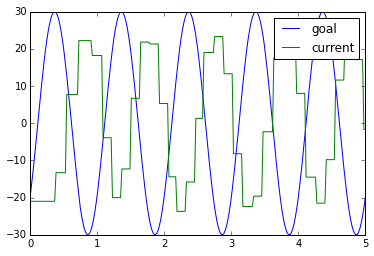

In [6]:
%pylab inline

t = linspace(0, 5, len(current))
plot(t, goal)
plot(t, current)

legend(('goal', 'current'))

Similarly, we can observe a goto position using the *minimum jerk* mode which shows the smooth acceleration and deceleration:

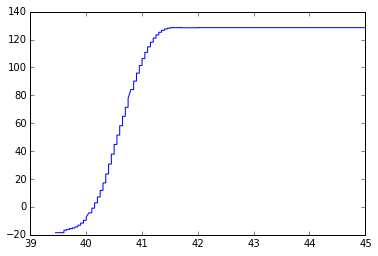

In [18]:
poppy.l_shoulder_x.goto_behavior = 'minjerk'

poppy.l_shoulder_x.goto_position(130, 2)

pos = []
t= []
t0 = time.time()

while time.time() - t0 < 30:
    pos.append(poppy.l_shoulder_x.present_position)
    t.append(poppy.current_simulation_time)
    time.sleep(0.02)
    
#print poppy.current_simulation_time
    
#t = linspace(0, 30, len(pos))
plot(t, pos)

In [14]:
poppy.reset_simulation()

## Tracking objects

Using a V-REP simulated robot, you can easily retrieve an object position and orientation. You just need to know its name in the vrep scene.

For instance, to get the 3D position of the left hand, you just have to do:

In [19]:
poppy.get_object_position('l_forearm_visual')

[0.33110520243644714, 0.03324659913778305, 0.7443821430206299]

This can be used for discovering a reachable space for instance:

In [ ]:
reached_pt = []

for m in poppy.l_arm:
    m.goto_behavior = 'minjerk'

for _ in range(25):
    poppy.reset_simulation()
    
    pos = {m.name: randint(min(m.angle_limit), max(m.angle_limit)) for m in poppy.l_arm}
    poppy.goto_position(pos, 2., wait=True)
        
    reached_pt.append(poppy.get_object_position('l_forearm_visual'))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ax = axes(projection='3d')
ax.scatter(*array(reached_pt).T)

Please see the [explauto](https://github.com/flowersteam/explauto) library if you are interested in autonomous exploration experiment using a Poppy Creature.

In [27]:
poppy.reset_simulation()

## Using primitives

Pypot also comes with the [Primitive](http://poppy-project.github.io/pypot/primitive.html) abstraction. The idea is to write simple behaviors that can be automatically combined to create more complex behaviors. As the primitive is likely to change in the future, and go toward something better defined, we will only show the very basic stuff you can do using primitives.

In more technical details, a primitive is only a thread which have access to all robot sensors and effectors. A [primitive manager](http://poppy-project.github.io/pypot/pypot.primitive.html#module-pypot.primitive.manager) is used to gather all primitives orders and combined them using a filter (a simple sum by default).

As an example of how to use primitives, we will use one of the predefined primitives, the [Sinus](http://poppy-project.github.io/pypot/pypot.primitive.html#pypot.primitive.utils.Sinus):

In [28]:
from pypot.primitive.utils import Sinus

Primitives are usually instantiated with a robot as the first argument. As Sinus is a [LoopPrimitive](http://poppy-project.github.io/pypot/pypot.primitive.html#pypot.primitive.primitive.LoopPrimitive) (i.e. a specific primitive which call an update method at a predefined frequency), you also need to pass the call frequency as the second argument).

The other arguments, here the motors list, the amplitude and the frequency are specific to the [Sinus](http://poppy-project.github.io/pypot/pypot.primitive.html#pypot.primitive.utils.Sinus) primitive.

In [29]:
sin_1 = Sinus(poppy, 25., [poppy.head_z, poppy.head_y], amp=15, freq=.15)

A primitive can be:
* started (re-started)
* stopped
* paused
* resumed

By running the following code, you should see both motors of the head performs a sinusoid.

In [30]:
sin_1.start()

Multiples primitives can be runned at the same time:

In [31]:
sin_2 = Sinus(poppy, 25., [poppy.head_z, ], amp=8, freq=.5)
sin_2.start()

We will now write a simple motor position logger using a loop primitive:

In [32]:
from pypot.primitive import LoopPrimitive

class MotorPositionLogger(LoopPrimitive):
    def __init__(self, robot, refresh_freq, motor):
        LoopPrimitive.__init__(self, robot, refresh_freq)
        
        self.motor = getattr(self.robot, motor.name)

    # This code will be called each time the primitive is started
    def setup(self):
        self.positions = []
       
    # This method will be called at the predefined frequency
    def update(self):
        self.positions.append(self.motor.present_position)

In [33]:
logger = MotorPositionLogger(poppy, 50, poppy.head_z)

We will illustrate the combination of primitives by pausing one of them in the middle of the recording:

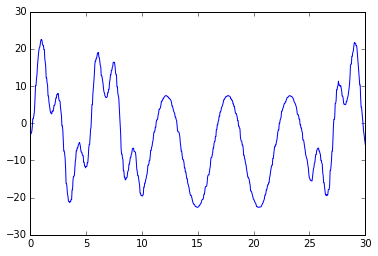

In [34]:
logger.start()

time.sleep(10)
sin_2.pause()

time.sleep(15)
sin_2.resume()

time.sleep(5)
logger.stop()

pos = logger.positions

plot(linspace(0, 30, len(pos)), pos)

You can see on the plot above, that the two sinusoids are combined from 0 to 10 and from 25 to 30. From 10 to 25 only one of the sinusoid is applied.

Now we stop all running primitives:

In [35]:
for p in poppy.active_primitives:
    p.stop()

# Appendix: switching from a simulated poppy to a real one

As mentionned in the introduction, most of the code above can be run on a "real" robot. All you need to change is the way the robot is instantiated. 

You have to replace:

```python
poppy = PoppyHumanoid(simulator='vrep')
```

by 

```python
poppy = PoppyHumanoid()
```

Of course, some of the directly V-REP related code - such as *reset_simulation* or *get_object_position* does not have any direct equivalent on the real robot. But all the rest should work and give about the same results on the real or the simulated robot.